## Glass Plotting

In [2]:
import warnings
warnings.filterwarnings('ignore')
from nilearn import plotting
from nilearn.input_data import NiftiMasker
import nilearn.masking
from nilearn import image



/home/krutika/.virtualenvs/kdm-jupyter/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
plotting.plot_glass_brain("./data/sub-01/ses-perceptionTraining01/anat/sub-01_ses-perceptionTraining01_inplaneT2.nii.gz") 
plotting.plot_glass_brain("./data/sourcedata/sub-01/anat/sub-01_mask_LH_FFA.nii.gz")   
plotting.plot_glass_brain("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz")   

## Smoothening Image

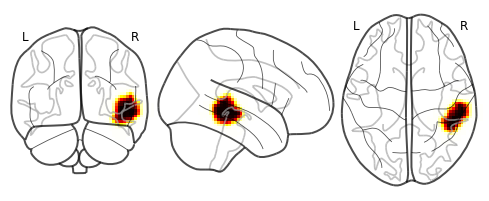

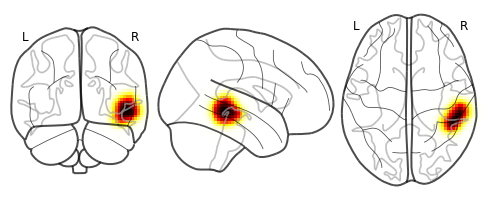

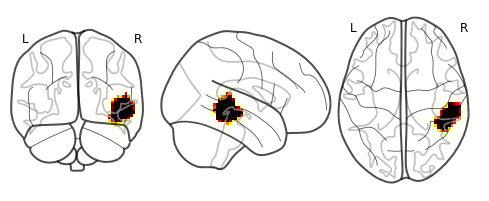

In [8]:
smoothed_img = image.smooth_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz", fwhm=5) 
plotting.plot_glass_brain(smoothed_img)   
smoothed_img = image.smooth_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz", fwhm=10) 
plotting.plot_glass_brain(smoothed_img)   

plotting.plot_glass_brain("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz")   

## Extracting n-th image from 4D images

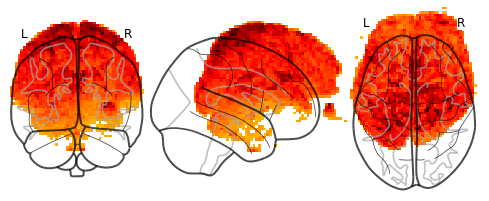

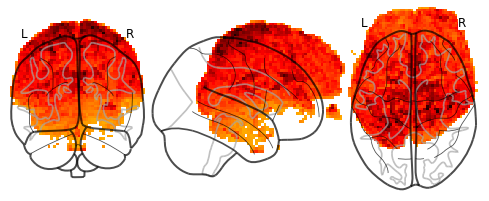

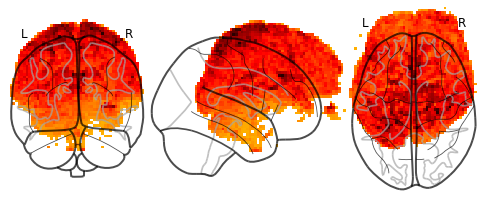

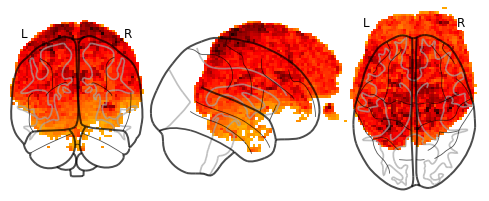

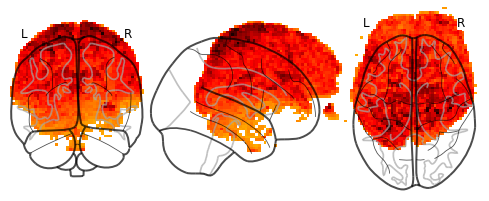

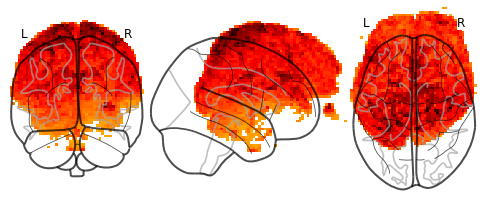

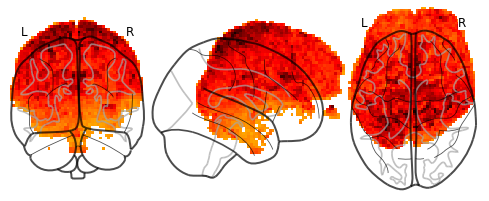

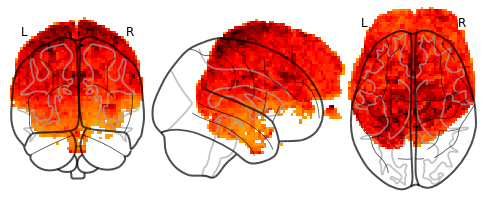

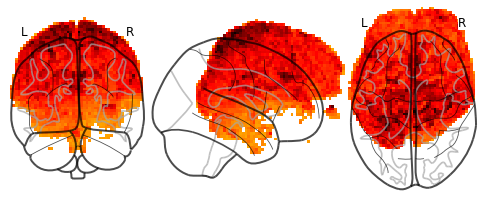

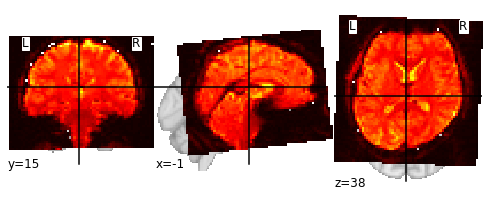

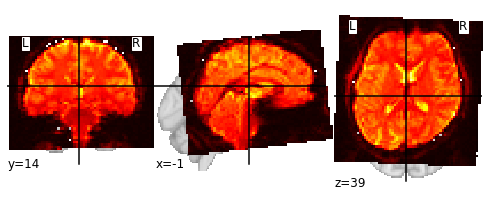

In [3]:
first_volume = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 0)
plotting.plot_glass_brain(first_volume)


vol2 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 2)
plotting.plot_glass_brain(vol2)   

vol3 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 3)
plotting.plot_glass_brain(vol3)   

vol4 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 4)
plotting.plot_glass_brain(vol4)   

vol5 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 5)
plotting.plot_glass_brain(vol5)   

vol6 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 6)
plotting.plot_glass_brain(vol6)  

vol100 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 100)
plotting.plot_glass_brain(vol100) 

vol101 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 101)
plotting.plot_glass_brain(vol101) 

vol102 = image.index_img("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz", 102)
plotting.plot_glass_brain(vol102) 
plotting.plot_stat_map(first_volume, threshold=3,colorbar=False)
plotting.plot_stat_map(vol102, threshold=3,colorbar=False)

## Smoothening all volumes in 4D image

In [10]:
import nibabel
!ls ./data/sourcedata/sub-01/anat/s
rh = nibabel.load("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz").get_data()
lh = nibabel.load("./data/sourcedata/sub-01/anat/sub-01_mask_LH_FFA.nii.gz").get_data()
plotting.plot_glass_brain(rh)
# plotting.plot_glass_brain(lh)

ls: cannot access './data/sourcedata/sub-01/anat/s': No such file or directory


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

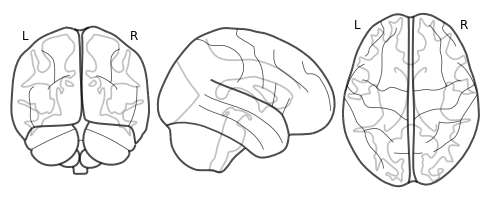

In [14]:
plotting.plot_glass_brain(nilearn.masking.intersect_masks(["./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz","./data/sourcedata/sub-01/anat/sub-01_mask_LH_FFA.nii.gz"],  connected=True))

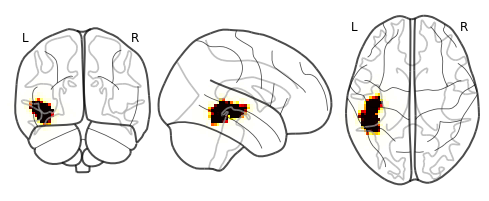

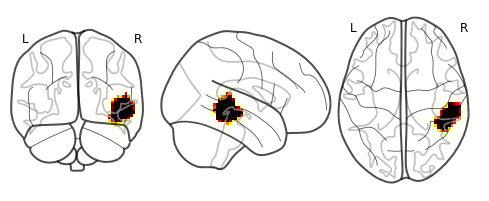

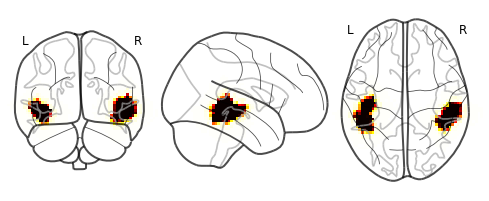

In [18]:
rh = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_FFA.nii.gz")
lh = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_LH_FFA.nii.gz")
ffa = image.math_img("img1 + img2", img1=rh, img2=lh)
plotting.plot_glass_brain(lh)
plotting.plot_glass_brain(rh)
plotting.plot_glass_brain(ffa)

In [10]:
masker = NiftiMasker(mask_img=ffa, standardize=True)
fmri_masked = masker.fit_transform("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz")
print(fmri_masked.shape)

NameError: name 'ffa' is not defined

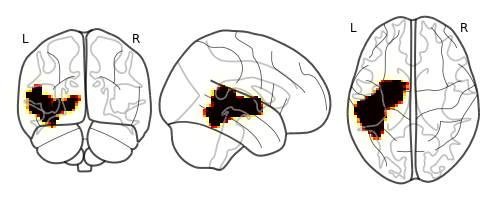

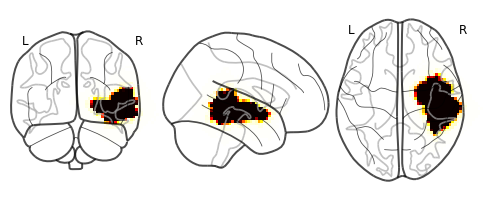

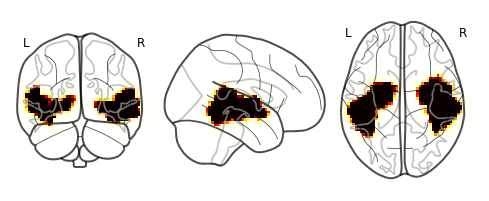

In [22]:
rh_hvc = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_HVC.nii.gz")
lh_hvc = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_LH_HVC.nii.gz")
hvc = image.math_img("img1 + img2", img1=rh_hvc, img2=lh_hvc)
plotting.plot_glass_brain(lh_hvc)
plotting.plot_glass_brain(rh_hvc)
plotting.plot_glass_brain(hvc)

In [23]:
masker_hvc = NiftiMasker(mask_img=hvc, standardize=True)
fmri_masked_hvc = masker.fit_transform("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz")
print(fmri_masked_hvc.shape)

(178, 614)


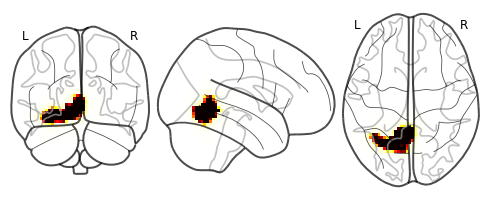

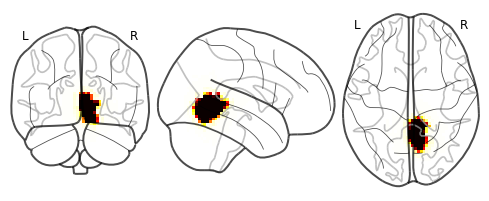

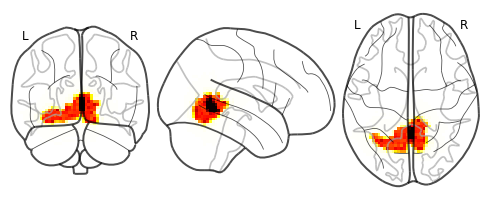

In [6]:
rh_v1d = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_V1d.nii.gz")
lh_v1d = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_LH_V1d.nii.gz")
v1d = image.math_img("img1 + img2", img1=rh_v1d, img2=lh_v1d)
plotting.plot_glass_brain(lh_v1d)
plotting.plot_glass_brain(rh_v1d)
plotting.plot_glass_brain(v1d)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 50)
affine: 
[[ -2.98191023   0.27329564   0.18308657  89.09443665]
 [  0.23818141   2.94542456  -0.51743913 -76.13721466]
 [  0.22689384   0.4997831    2.9493618  -80.63154602]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 64 64 50  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         3.         3.         2.9999998  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  

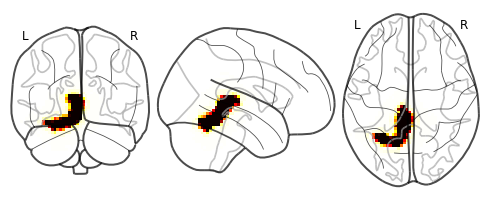

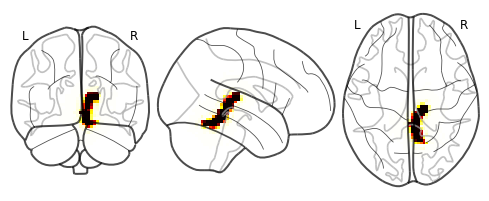

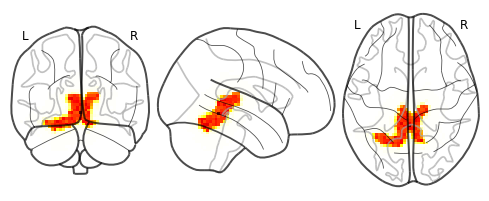

In [10]:
rh_v1v = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_RH_V1v.nii.gz")
lh_v1v = image.load_img("./data/sourcedata/sub-01/anat/sub-01_mask_LH_V1v.nii.gz")
v1v = image.math_img("img1 + img2", img1=rh_v1v, img2=lh_v1v)
print(v1v)

plotting.plot_glass_brain(lh_v1v)
plotting.plot_glass_brain(rh_v1v)
plotting.plot_glass_brain(v1v)


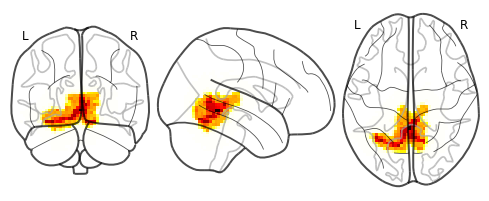

In [12]:
v1 = image.math_img("img1 + img2", img1=v1v, img2=v1d)
plotting.plot_glass_brain(v1)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 50)
affine: 
[[ -2.98191023   0.27329564   0.18308657  89.09443665]
 [  0.23818141   2.94542456  -0.51743913 -76.13721466]
 [  0.22689384   0.4997831    2.9493618  -80.63154602]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 64 64 50  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.         3.         3.         2.9999998  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.

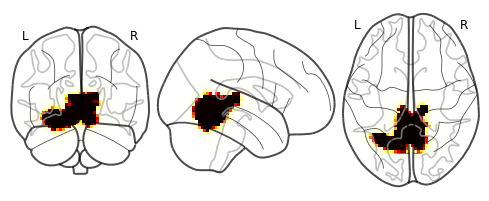

In [17]:
intersection = (nilearn.masking.intersect_masks([rh_v1v,lh_v1v, rh_v1d, lh_v1d], threshold=0.1, connected=True))
plotting.plot_glass_brain(intersection)
print(intersection)
masker_v1 = NiftiMasker(mask_img=intersection, standardize=True)


In [19]:
fmri_masked_v1 = masker.fit_transform("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz")
print(fmri_masked_v1.shape)

ValueError: Given mask is not made of 2 values: [0.000000e+00 8.285441e-05 9.049648e-05 ... 8.345533e+02 8.405651e+02
 8.624251e+02]. Cannot interpret as true or false

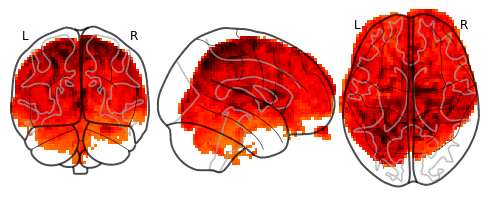

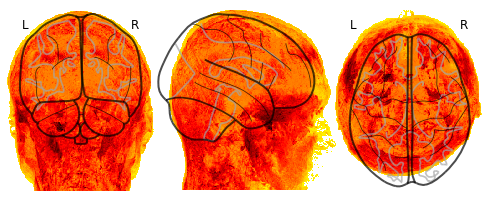

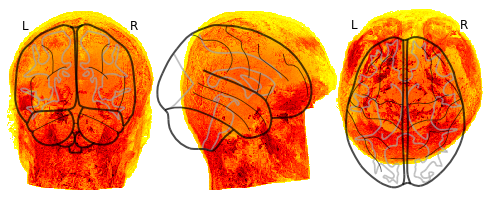

In [4]:
plotting.plot_glass_brain("./data/subjecth5files/Subject1_SpaceTemplate.nii")   
plotting.plot_glass_brain("./data/subjecth5files/Subject1_T1wAligned.nii")  
plotting.plot_glass_brain("./data/sub-01/ses-anatomy/anat/sub-01_ses-anatomy_T1w.nii.gz")   



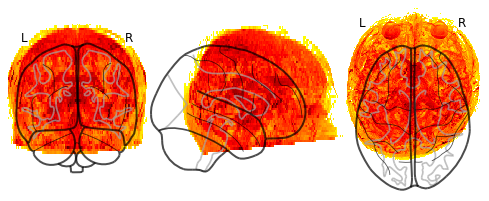

In [6]:
plotting.plot_glass_brain("./data/sub-01/ses-perceptionTraining01/anat/sub-01_ses-perceptionTraining01_inplaneT2.nii.gz")   
        

In [3]:
mask_img = image.load_img("./data/subjecth5files/Subject1_T1wAligned.nii")
masker = NiftiMasker(mask_img=mask_img, standardize=True)
fmri_masked= masker.fit_transform("./data/sub-01/ses-perceptionTraining01/func/sub-01_ses-perceptionTraining01_task-perception_run-01_bold.nii.gz")
print(fmri_masked.shape)

KeyboardInterrupt: 